## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Датасет содержит ряд признаков приложений с сервера Google Play. Целью является определить, платное приложение или нет.

Установливаем библиотеку Pandas:

In [158]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [160]:
data = pd.read_csv('googleplaystore.csv')

data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Выводим первые 10 строк dataset-а:

In [181]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000+,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000+,Free,0,Everyone,Art & Design;Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000+,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000+,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000+,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000+,Free,0,Everyone,Art & Design,March 26 2017,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000+,Free,0,Everyone,Art & Design,April 26 2018,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000+,Free,0,Everyone,Art & Design,June 14 2018,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000+,Free,0,Everyone,Art & Design,September 20 2017,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000+,Free,0,Everyone,Art & Design;Creativity,July 3 2018,2.8,4.0.3 and up


Выводим последние 10 строк dataset-а:

In [184]:
data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,5000+,Free,0,Everyone,Maps & Navigation,June 13 2018,2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,100000+,Free,0,Everyone,Weather,February 16 2014,6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000+,Free,0,Everyone,Books & Reference,March 23 2014,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,June 18 2017,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,September 29 2016,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000+,Free,0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000+,Free,0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000+,Free,0,Mature 17+,Books & Reference,January 19 2015,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000+,Free,0,Everyone,Lifestyle,July 25 2018,Varies with device,Varies with device


### О наборе данных:

- App - название приложения
- Category - категория приложения
- Rating - рейтинг приложения
- Reviews - количество отзывов о приложении
- Size - размер приложения
- Installs - количество скачиваний приложения
- Type - платное или бесплатное приложение
- Price - цена приложения
- Content Rating - возрастное ограничение
- Genres - жанр приложения
- Last Updated - последнее обновление
- Current Ver - текущая версия приложения
- Android Ver - версия Android OS, которую поддерживает приложение

Выведем описательную статистику по нашему dataset-у:

In [163]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [164]:
data.describe(include = ['object'])

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [177]:
data.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9659,34,NaN,6002,462,21,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,1000000+,Free,0,Everyone,Tools,August 3 2018,Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализируем данную матрицу корреляции:

In [166]:
import sys
! pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


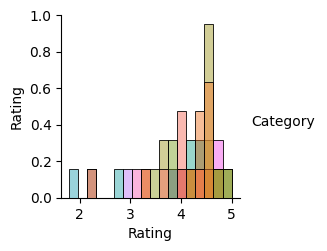

In [167]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
sns.pairplot(data.iloc[random_subset], hue='Category', diag_kind='hist')

In [182]:
data = data.replace(",/g", "", regex=True)
data = data.replace("0\+/gm", "0")

Так как большинство признаков номинальные, для правильной визуализации нам нужно обработать данные.

In [185]:
data['Category'] = data['Category'].astype('category')
data['Category'] = data['Category'].replace("1.9", np.nan , regex=True)
data['Category'].dtype

CategoricalDtype(categories=['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
                  'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
                  'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                  'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
                  'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
                  'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
                  'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
                  'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                  'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
, ordered=False)

In [186]:
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].replace("0", "Free" , regex=True)
data['Type'].dtype

CategoricalDtype(categories=['0', 'Free', 'Paid'], ordered=False)

In [187]:
data['Genres'] = data['Genres'].astype('category')
data['Genres'].dtype

CategoricalDtype(categories=['Action', 'Action;Action & Adventure', 'Adventure',
                  'Adventure;Action & Adventure', 'Adventure;Brain Games',
                  'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
                  'Arcade;Pretend Play', 'Art & Design',
                  ...
                  'Tools;Education', 'Travel & Local',
                  'Travel & Local;Action & Adventure', 'Trivia',
                  'Trivia;Education', 'Video Players & Editors',
                  'Video Players & Editors;Creativity',
                  'Video Players & Editors;Music & Video', 'Weather', 'Word'],
, ordered=False)

In [188]:
data['Reviews'] = data['Reviews'].replace("3.0M", 3000000 , regex=True)
data['Reviews'] = data['Reviews'].astype('float')
data['Reviews'].dtype

dtype('float64')

In [189]:
data['Size'] = data['Size'].replace("Varies with device", np.nan , regex=True)
data['Size'] = data['Size'].str[:-1]
data['Size'] = pd.to_numeric(data['Size'])
data['Size'].dtype

dtype('float64')

In [190]:
data['Installs'] = data['Installs'].replace("Free", np.nan , regex=True)
data['Installs'] = data['Installs'].apply(lambda v: float(str(v).replace("+","").replace(",","")))
data['Installs'] = data['Installs'].astype('float')
data['Installs'].dtype

dtype('float64')

In [191]:
data['Price'] = data['Price'].replace("Everyone", 0, regex=True)
data['Price'] = data['Price'].apply(lambda v: float(str(v).replace("$","")))
data['Price'].dtype

dtype('float64')

In [192]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [193]:
data['Content Rating'] = data['Content Rating'].apply(lambda v: str(v).replace("Adults only 18+","18").replace("Mature 17+","18").replace("Teen","6").replace("Unrated","0").replace("Everyone","0").replace("0 10+", "10"))
data['Content Rating'] = data['Content Rating'].astype('float')
data['Content Rating'].dtype

dtype('float64')

In [194]:
data.dtypes

App                 object
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type              category
Price              float64
Content Rating     float64
Genres            category
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

Посмотрим на сбалансированность классов

<AxesSubplot: xlabel='Type'>

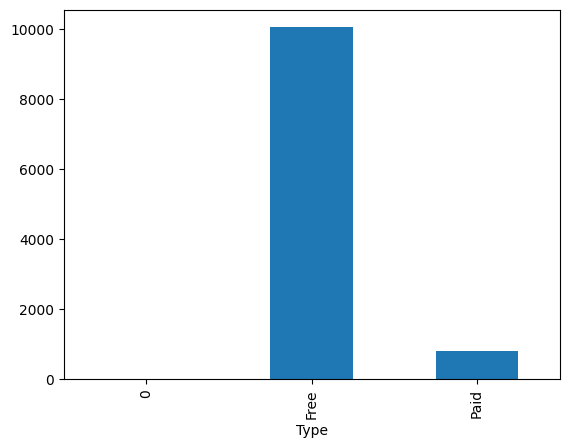

In [195]:
data.groupby(['Type']).size().plot(kind='bar') 

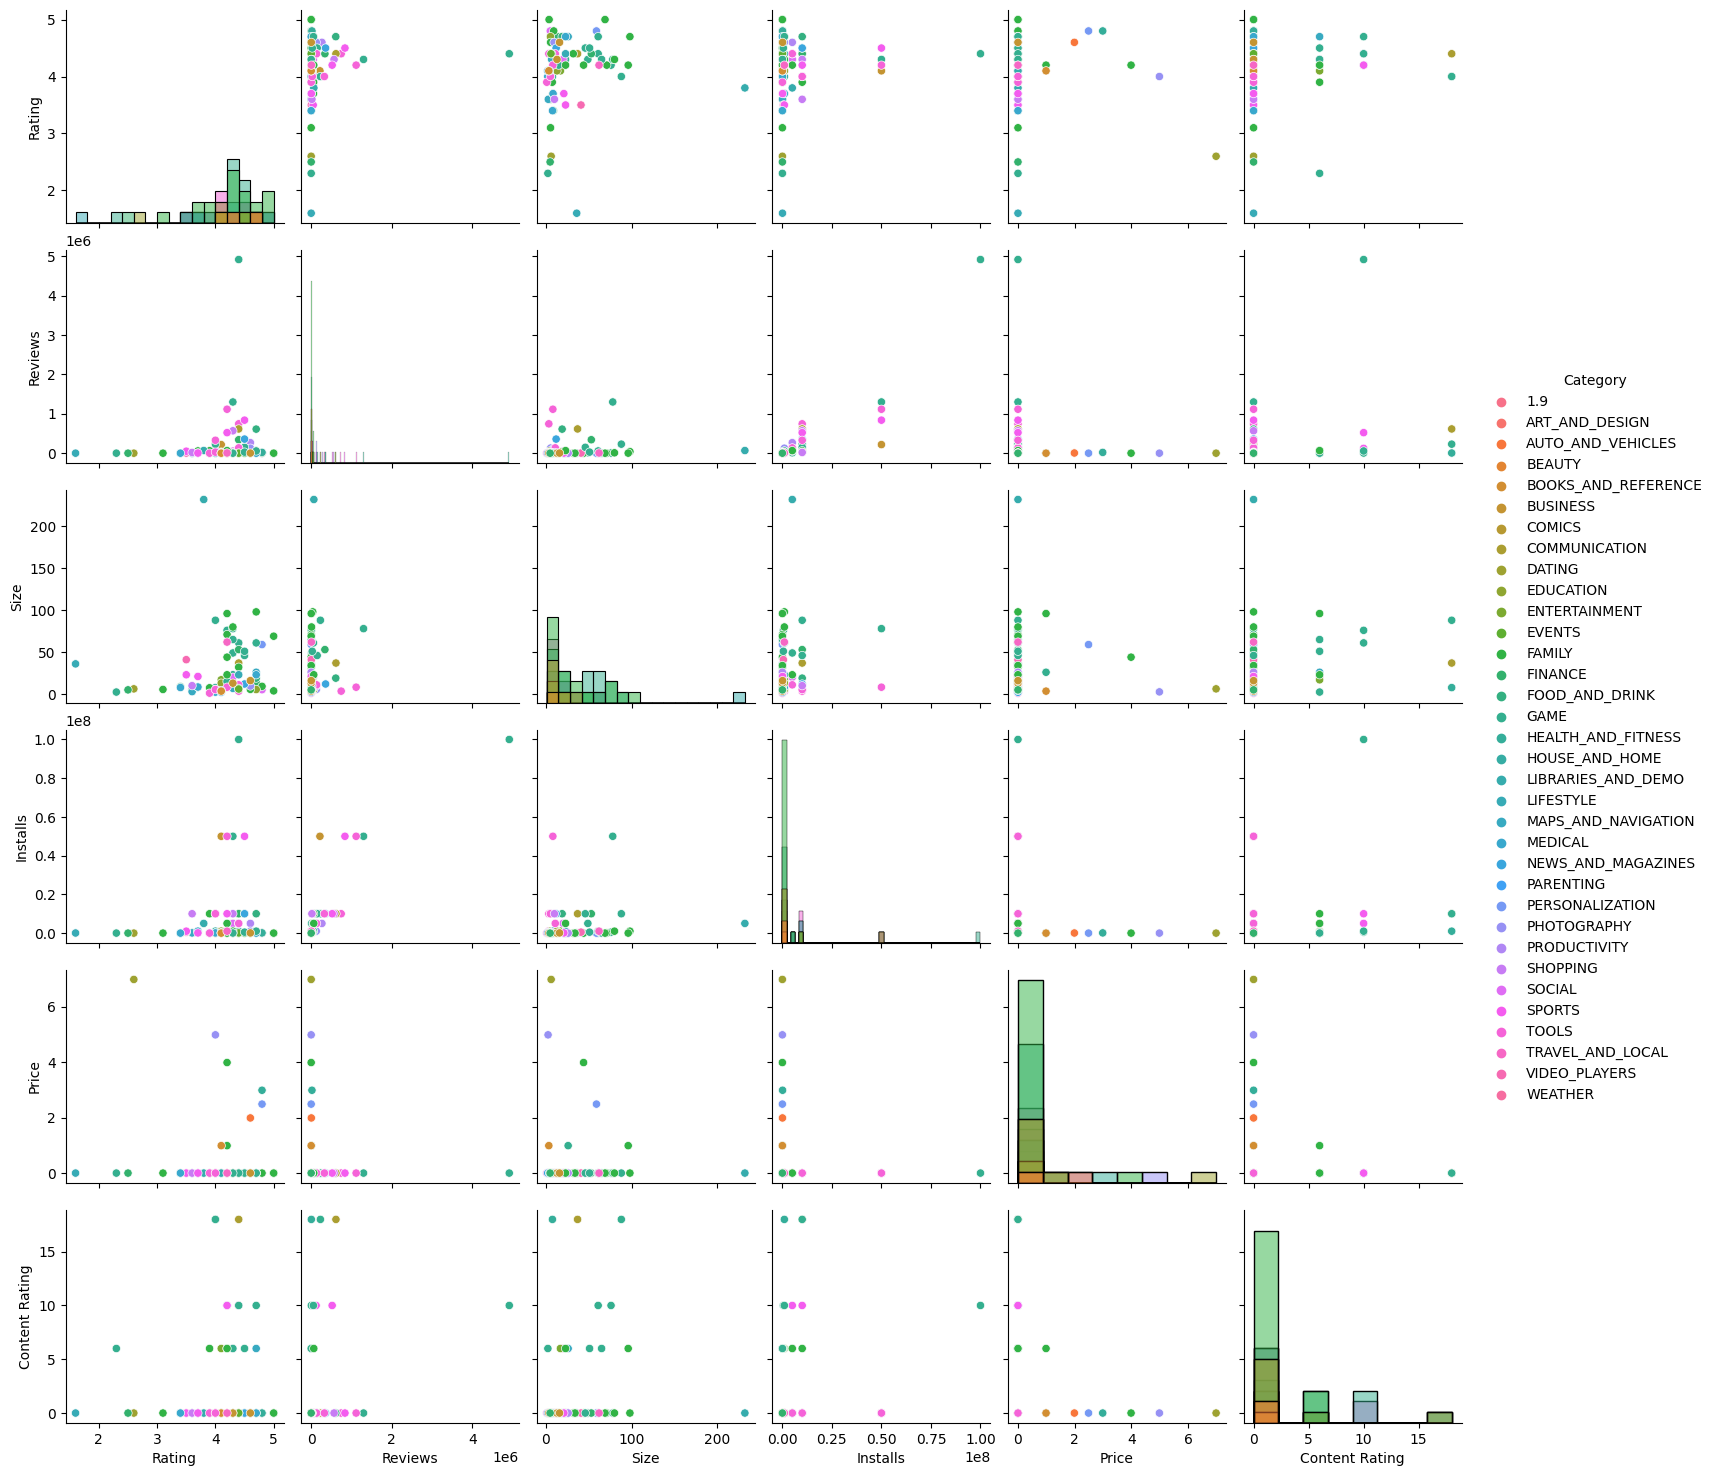

In [196]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
sns.pairplot(data.iloc[random_subset], hue='Category', diag_kind='hist')

In [197]:
data.corr()

C:\Users\Nick\AppData\Local\Temp\ipykernel_12968\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rating,Reviews,Size,Installs,Price,Content Rating
Rating,1.000000,0.067645,0.016530,0.051355,-0.021176,-0.001377
Reviews,0.067645,1.000000,0.033633,0.643122,-0.009672,0.058179
Size,0.016530,0.033633,1.000000,0.014753,0.014348,-0.017409
Installs,0.051355,0.643122,0.014753,1.000000,-0.011689,0.030702
Price,-0.021176,-0.009672,0.014348,-0.011689,1.000000,-0.017587
Content Rating,-0.001377,0.058179,-0.017409,0.030702,-0.017587,1.000000


C:\Users\Nick\AppData\Local\Temp\ipykernel_12968\1886614439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square=True, cmap='coolwarm')


<AxesSubplot: >

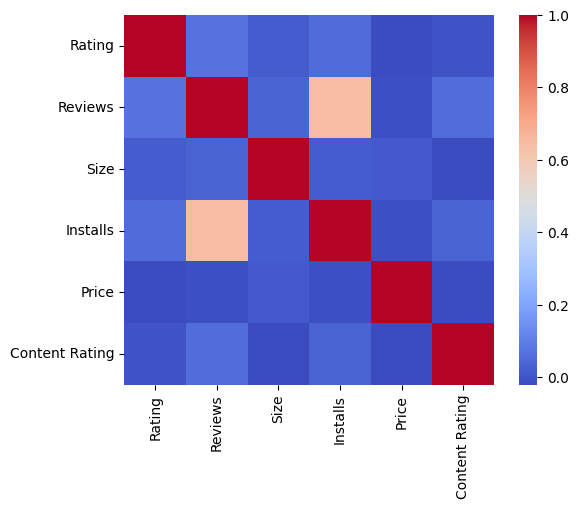

In [198]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')

Как видно из матрицы корреляции и диаграмм рассеивания, признаки слабо коррелируют друг с другом.

## Готовим данные

Избавимся от пропущенных значений

In [199]:
data.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [200]:
data.drop_duplicates(subset='App', inplace=True)
data.dropna(axis=0, how="all", subset=['Android Ver'], inplace=True)
data.dropna(axis=0, how="all", subset=['Category'], inplace=True)
data.dropna(axis=0, how="all", subset=['Current Ver'], inplace=True)
data.dropna(axis=0, how="all", subset=['Type'], inplace=True)

In [201]:
data.isna().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size              1226
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [202]:
del data['Android Ver']
del data['Current Ver']
del data['App']
del data['Last Updated']

Избавимся от выбросов

Text(0, 0.5, 'Rating')

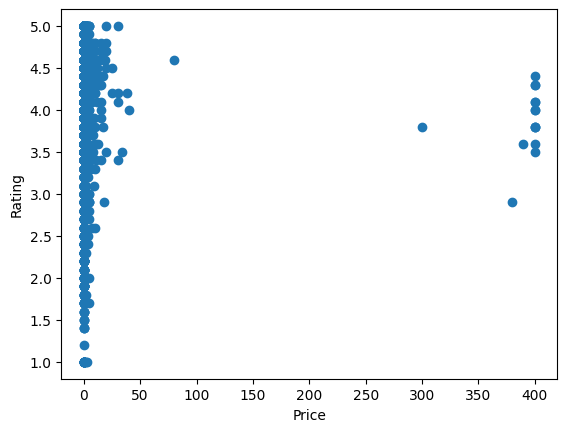

In [203]:
plt.scatter(data['Price'], data['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')

In [204]:
data['Price'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, 1])

0.05      0.00
0.10      0.00
0.20      0.00
0.30      0.00
0.40      0.00
0.50      0.00
0.70      0.00
0.90      0.00
0.95      1.99
1.00    400.00
Name: Price, dtype: float64

Text(0, 0.5, 'Rating')

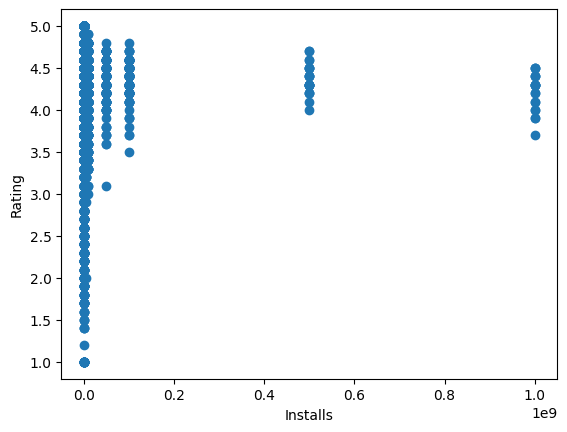

In [205]:
plt.scatter(data['Installs'], data['Rating'])
plt.xlabel('Installs')
plt.ylabel('Rating')

In [206]:
data['Installs'].quantile([.005,.1,.2,.3,.4,.50,.70, .8, .90, .95, .96, .98, 1])

0.005    1.000000e+00
0.100    1.000000e+02
0.200    1.000000e+03
0.300    5.000000e+03
0.400    1.000000e+04
0.500    1.000000e+05
0.700    1.000000e+06
0.800    5.000000e+06
0.900    1.000000e+07
0.950    1.000000e+07
0.960    5.000000e+07
0.980    1.000000e+08
1.000    1.000000e+09
Name: Installs, dtype: float64

Text(0, 0.5, 'Size')

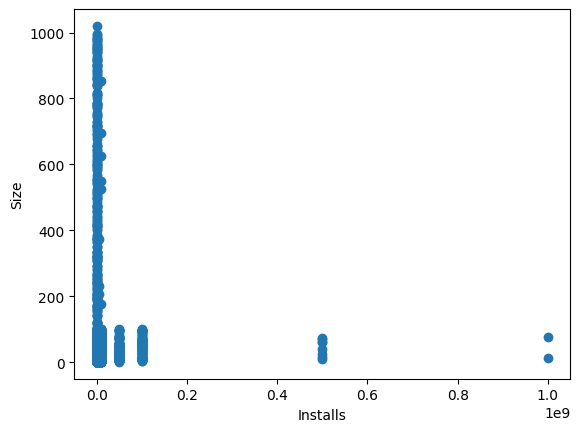

In [207]:
plt.scatter(x = data['Installs'], y = data['Size'])
plt.xlabel('Installs')
plt.ylabel('Size')

In [208]:
data['Size'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05       2.1
0.10       2.9
0.20       4.3
0.30       6.5
0.40       9.5
0.50      14.0
0.70      27.0
0.90      62.0
0.95      91.0
0.98     364.0
1.00    1020.0
Name: Size, dtype: float64

In [209]:
rows_to_drop = data[
    (data['Price'] > data['Price'].quantile(0.995)) | 
    (data['Size'] > data['Size'].quantile(0.995)) | 
    (data['Installs']  > data['Installs' ].quantile(0.95)) |
    (data['Installs'] == 0)].index
data = data.drop(rows_to_drop)
data.shape

(9113, 9)

Избавляемся от оставшихся пропущенных значений при помощи медианы

In [210]:
col = ["Rating", "Size"]
data.fillna(data[col].median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [211]:
data.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

Удалим признак

In [212]:
data['Genres'].unique()

['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Art & Design;Action & Adventure', 'Auto & Vehicles', ..., 'Role Playing;Brain Games', 'Strategy;Education', 'Racing;Pretend Play', 'Communication;Creativity', 'Strategy;Creativity']
Length: 118
Categories (120, object): ['Action', 'Action;Action & Adventure', 'Adventure', 'Adventure;Action & Adventure', ..., 'Video Players & Editors;Creativity', 'Video Players & Editors;Music & Video', 'Weather', 'Word']

In [213]:
del data['Genres']

Применим метод бинаризации

In [214]:
data['Category'].unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (34, object): ['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', ..., 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

In [215]:
dummies = pd.get_dummies(data['Category'])

In [216]:
dummies.head()

,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
data = pd.concat((data, dummies), axis=1)
data = data.drop(['Category'], axis=1)

Заменим на числовой

In [218]:
data['Type'].unique()

['Free', 'Paid']
Categories (3, object): ['0', 'Free', 'Paid']

In [219]:
data['Type'] = pd.factorize(data['Type'])[0]

In [220]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159.0,19.0,10000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.0,500000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.7,5000000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.8,100000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167.0,5.6,50000.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Нормализация**

In [221]:
data.drop("1.9", axis=1, inplace=True)

In [222]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

In [223]:
data.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,...,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.00000
mean,0.796340,0.015805,0.033767,0.156006,0.075716,0.016034,0.094200,0.006694,0.009218,0.005816,...,0.039175,0.026117,0.037200,0.020740,0.023922,0.034347,0.084056,0.022934,0.015802,0.00823
std,0.126258,0.052506,0.088366,0.311203,0.264558,0.073473,0.232868,0.081545,0.095570,0.076044,...,0.194021,0.159491,0.189261,0.142519,0.152814,0.182128,0.277487,0.149702,0.124714,0.09035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.750000,0.000007,0.005691,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.825000,0.000238,0.013937,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.875000,0.006750,0.030197,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Разбиваем наши данные на y и x:

In [224]:
X = data.drop(['Type', 'Price'], axis = 1)
y = data['Type']
feature_names = X.columns
print(feature_names)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Content Rating',
       'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object')


In [225]:
X=X.to_numpy()
y=y.to_numpy()

In [226]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[7.75000000e-01 5.14004522e-05 2.09059233e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.25000000e-01 3.12605266e-04 1.50987224e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.25000000e-01 2.82896451e-02 8.94308943e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.25000000e-01 9.69819853e-07 9.87224158e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.75000000e-01 3.68531544e-05 1.39372822e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.75000000e-01 1.28762012e-01 2.09059233e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

[0. 0. 0. ... 0. 0. 0.]

(9113, 38)

(9113,)



Разделим наш dataset на обучающую и тестовую выборку:

In [227]:
import sys
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

6379 2734 (6379,) (2734,)


In [229]:
print(np.argwhere(np.isnan(X_train)))
for i, j in np.argwhere(np.isnan(X_train)):
    X_train[i][j] = X_train[0][j]

print(np.argwhere(np.isnan(X_test)))
for i, j in np.argwhere(np.isnan(X_test)):
    X_test[i][j] = X_test[0][j]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[]
[]
(6379, 38)
(6379,)
(2734, 38)
(2734,)


Интерпретируем все значения `y` как целые числа:

In [230]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [231]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [232]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [233]:
print(f"{err_train}")
print(f"{err_test}")

0.07399278883837591
0.06986100950987564


In [234]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[5860   20]
 [ 452   47]]

[[2528   15]
 [ 176   15]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

Лучший результат достигается при n=3:

In [235]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.060354287505878665
0.08339429407461595


Такую высокую точность для алгоритмов мы получаем, возможно, из за несбалансированности классов, так как беспланых приложений намного больше, чем платных.
Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.
Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.

# Домашнее задание 5

## Нейронная сеть

### Нейронная сеть с двумя скрытыми слоями, подбор оптимального alpha

In [236]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [237]:
alpha_arr = np.logspace(-3, 2, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,50,), 
                              solver = 'adam',
                              activation = 'relu',
                              max_iter=1000,
                              random_state = 1)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

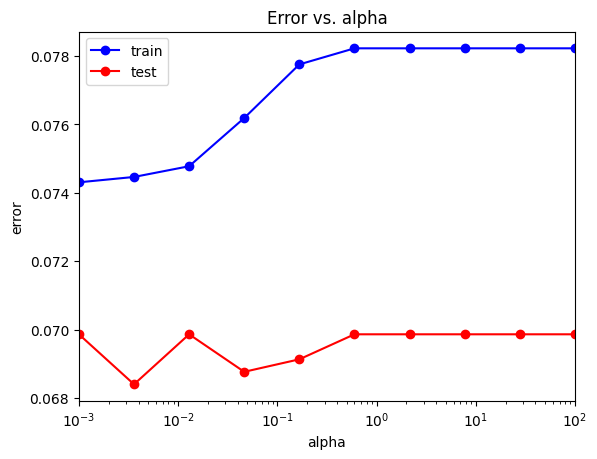

In [238]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

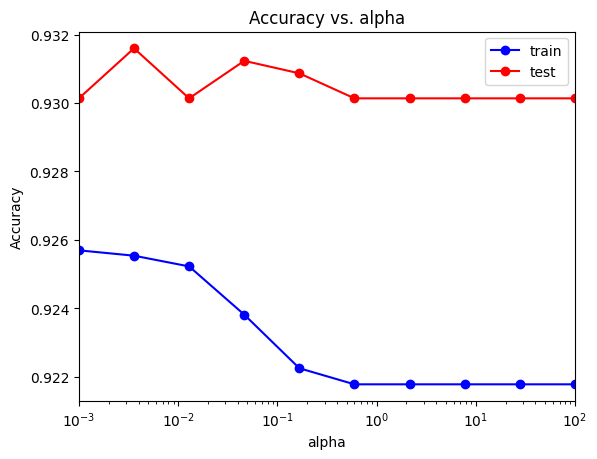

In [239]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [240]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.07430631760464022 0.06839795171909291


#### Выбираем alpha

In [241]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00359381]


In [242]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (50,50,),
                          solver = 'adam', activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07446308198777238
0.06986100950987564


C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [243]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[2528  176]
 [  15   15]]


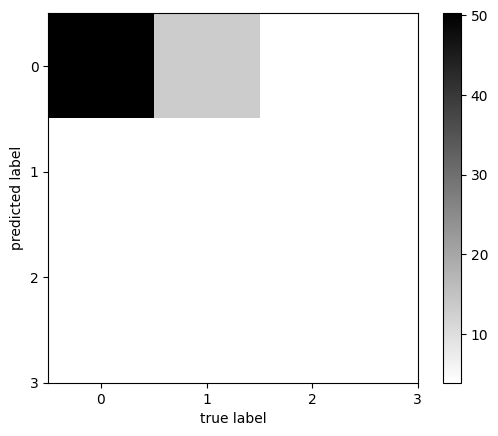

In [244]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(4))
plt.yticks(range(4))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [245]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

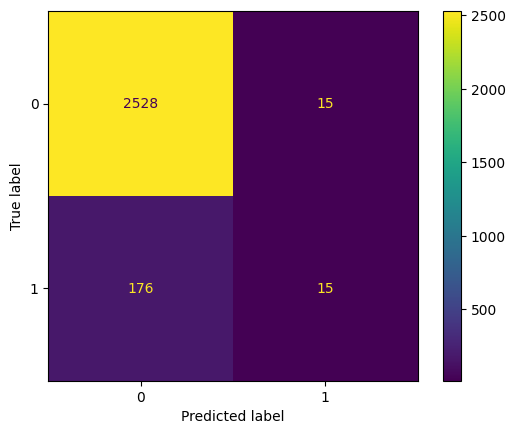

In [246]:
cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [247]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2543
           1       0.50      0.08      0.14       191

    accuracy                           0.93      2734
   macro avg       0.72      0.54      0.55      2734
weighted avg       0.90      0.93      0.91      2734



### Подбор числа нейронов и альфа

In [248]:
num_elems_arr = [x for x in range(10, 101, 10)]
alpha_arr = np.logspace(-3, 2, 11)
test_err = []
train_err = []
train_acc = []
test_acc = []

alpha_opts = []
min_test_errors = []
min_train_errors = []
min_test_accuracy = []
min_train_accuracy = []

for index, num_elems in enumerate(num_elems_arr):
    test_err.append(np.array([]))
    train_err.append(np.array([]))
    train_acc.append(np.array([]))
    test_acc.append(np.array([]))
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (num_elems,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
        mlp_model.fit(X_train, y_train)
        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err[index] = np.append(train_err[index], np.mean(y_train != y_train_pred))
        test_err[index] = np.append(test_err[index], np.mean(y_test != y_test_pred))
        train_acc[index] = np.append(train_acc[index], accuracy_score(y_train, y_train_pred))
        test_acc[index] = np.append(test_acc[index], accuracy_score(y_test, y_test_pred))
        
    min_test_err = np.min(test_err[index])
    alpha_opts.append(alpha_arr[test_err[index] == min_test_err])
    min_test_errors.append(min_test_err)
    tmp = test_err[index] == min_test_err
    min_train_errors.append(train_err[index][test_err[index] == min_test_err][0])
    min_test_accuracy.append(test_acc[index][test_err[index] == min_test_err][0])
    min_train_accuracy.append(train_acc[index][test_err[index] == min_test_err][0])

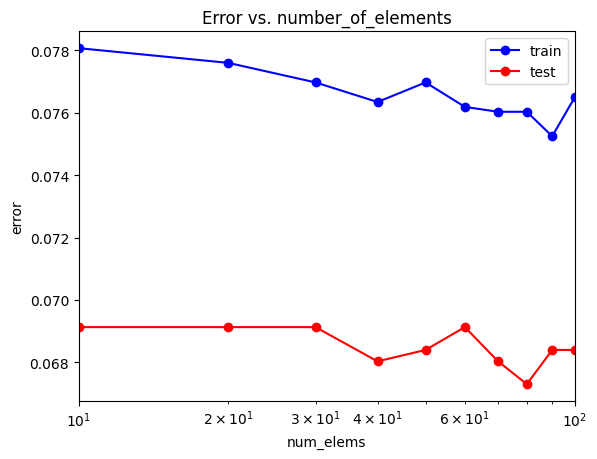

In [249]:
plt.semilogx(num_elems_arr, min_train_errors, 'b-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_errors, 'r-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Error vs. number_of_elements')
plt.xlabel('num_elems')
plt.ylabel('error')
plt.legend()

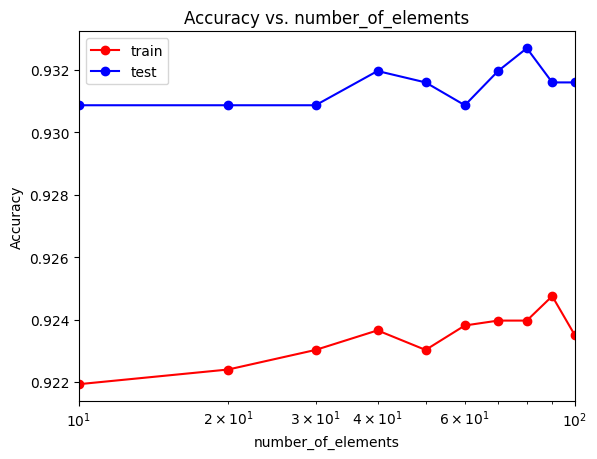

In [250]:
plt.semilogx(num_elems_arr, min_train_accuracy, 'r-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_accuracy, 'b-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Accuracy vs. number_of_elements')
plt.xlabel('number_of_elements')
plt.ylabel('Accuracy')
plt.legend()

In [251]:
print(min_test_errors[5])
print(alpha_opts[5])

0.06912948061448428
[0.001]


Вывод: лучший результат в 6.9% был достигнут при alpha = 0.001 и количестве нейронов 100

## Random forest classifier

In [252]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(25,201,25)]

for i in est_vals:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)

    y_test_predict = rfc.predict(X_test)
    err_train = np.mean(y_train != rfc.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  25
err_train: 0.0023514657469822856
err_test: 0.06108266276517922
---------
n_estimators =  50
err_train: 0.0010973506819250665
err_test: 0.061814191660570596
---------
n_estimators =  75
err_train: 0.00031352876626430476
err_test: 0.0592538405267008
---------
n_estimators =  100
err_train: 0.00031352876626430476
err_test: 0.061448427212874905
---------
n_estimators =  125
err_train: 0.00031352876626430476
err_test: 0.05998536942209217
---------
n_estimators =  150
err_train: 0.00031352876626430476
err_test: 0.05998536942209217
---------
n_estimators =  175
err_train: 0.00031352876626430476
err_test: 0.060351133869787854
---------
n_estimators =  200
err_train: 0.00031352876626430476
err_test: 0.05888807607900512
---------
best: 0.00031352876626430476 0.05888807607900512


Text(0, 0.5, 'error')

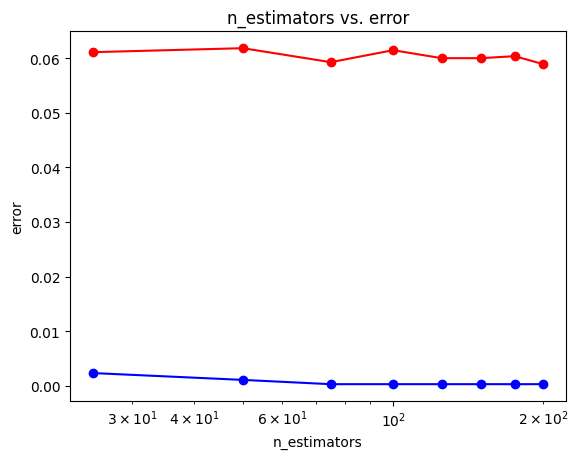

In [253]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [254]:
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(X_train, y_train)

y_test_predict = rfc.predict(X_test)
err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[2524  151]
 [  19   40]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2543
           1       0.00      0.00      0.00       191

    accuracy                           0.93      2734
   macro avg       0.47      0.50      0.48      2734
weighted avg       0.87      0.93      0.90      2734



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Самый лучший результат для Random forest classifier - 3% ошибки на тестовой выборке.

## Логистическая регрессия

In [255]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_predict))

err_train=0.07822542718294404
err_test=0.06986100950987564

[[2543  191]
 [   0    0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2543
           1       0.00      0.00      0.00       191

    accuracy                           0.93      2734
   macro avg       0.47      0.50      0.48      2734
weighted avg       0.87      0.93      0.90      2734



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результат: ошибка в 7%

## Общие выводы

* Самый лучший результат показал метод Random forest classifier с ошибкой в 3%
* Модель подвержена переобученности
* Лучше всего было использовать Random forest из-за простоты подбора параметра и скорости работы
* Random forest сумел обойти kNN на 5%